 1. Read and display the image.
 • Read the image using the Pillow library and display it.
 • You can also use matplotlib to display the image.


In [ ]:
# Upload the image
from google.colab import files
uploaded = files.upload()

# Now you can open the image
image = Image.open('onitsuka.jpg')  # Use the correct name after upload

Saving onitsuka.jpg to onitsuka.jpg


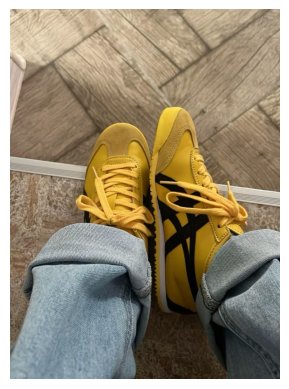

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Read the image
image = Image.open('onitsuka.jpg')

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

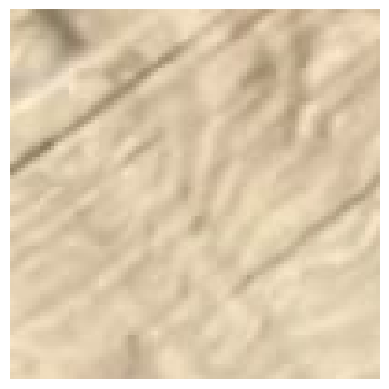

In [ ]:
import numpy as np

# Convert to NumPy array
image_array = np.array(image)

# Extract the top-left corner
top_left = image_array[:100, :100]

# Display the top-left corner
plt.imshow(top_left)
plt.axis('off')
plt.show()

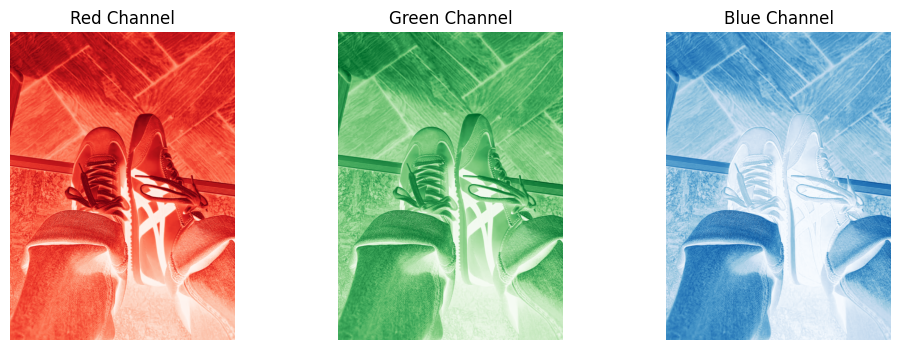

In [ ]:
# Separate the color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Display each channel
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.axis('off')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.axis('off')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.axis('off')
plt.title('Blue Channel')

plt.show()

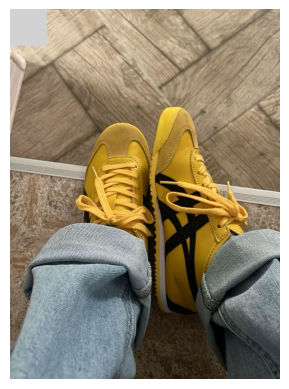

In [ ]:
# Modify pixel values
image_array[:100, :100] = 210

# Display the modified image
plt.imshow(image_array)
plt.axis('off')
plt.show()

 2.2 Exercise- 2:
 Complete all the Task.
 1. Load and display a grayscale image.
 • Load a grayscale image using the Pillow library.
 • Display the grayscale image using matplotlib.
 2. Extract and display the middle section of the image (150 pixels).
 • Extract a 150 pixel section from the center of the image using NumPy array slicing.
 • Display this cropped image using matplotlib.
 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
 • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
 above 100 to 255 (creating a binary image).
 • Display the resulting binary image.
 4. Rotate the image 90 degrees clockwise and display the result.
 • Rotatethe image by90degrees clockwise using the Pillow rotate method or by manipulating
 the image array.
 • Display the rotated image using matplotlib.
 5. Convert the grayscale image to an RGB image.
 • Convert the grayscale image into an RGB image where the grayscale values are replicated
 across all three channels (R, G, and B).
 • Display the converted RGB image using matplotlib.

In [ ]:
# Upload the image
from google.colab import files
uploaded = files.upload()

# Now you can open the image
image = Image.open('puma.jpg')

Saving puma.jpg to puma.jpg


Load and display a grayscale image. • Load a grayscale image using the Pillow library. • Display the grayscale image using matplotlib.

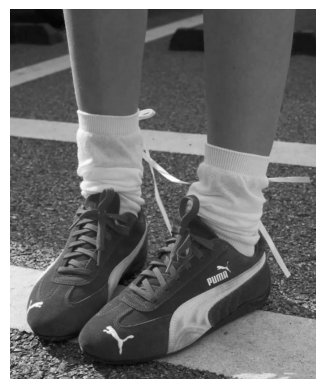

In [ ]:
# Load a grayscale image
gray_image = Image.open('puma.jpg').convert('L')

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

Extract and display the middle section of the image (150 pixels). • Extract a 150 pixel section from the center of the image using NumPy array slicing. • Display this cropped image using matplotlib.

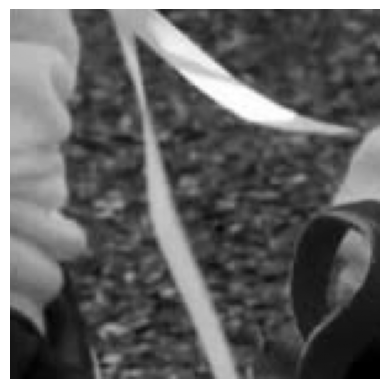

In [ ]:
gray_array = np.array(gray_image)

# Extract the middle section
h, w = gray_array.shape
middle_section = gray_array[h//2-75:h//2+75, w//2-75:w//2+75]

# Display the middle section
plt.imshow(middle_section, cmap='gray')
plt.axis('off')
plt.show()

Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0). • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values above 100 to 255 (creating a binary image). • Display the resulting binary image.

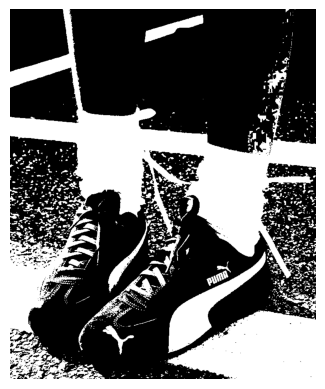

In [ ]:
# Apply threshold
binary_image = np.where(gray_array < 100, 0, 255).astype(np.uint8)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

Rotate the image 90 degrees clockwise and display the result. • Rotatethe image by90degrees clockwise using the Pillow rotate method or by manipulating the image array. • Display the rotated image using matplotlib.

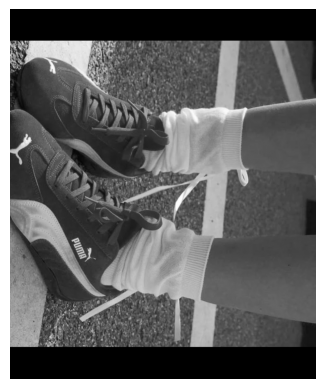

In [ ]:
# Rotate the image
rotated_image = gray_image.rotate(-90)

# Display the rotated image
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()

Convert the grayscale image to an RGB image. • Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B). • Display the converted RGB image using matplotlib.

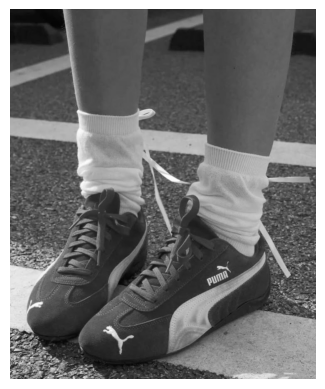

In [ ]:
# Convert to RGB
rgb_image = gray_image.convert('RGB')

# Display the RGB image
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

 3 Image Compression and Decompression using PCA.
 In this exercise, build a PCA from scratch using explained variance method for image compression task.
 You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
 choice.
 1. Load and Prepare Data:
 • Fetch an image of you choice.{If colour convert to grayscale}
 • Center the dataset- Standaridze the Data.
 • Calculate the covaraince matrix of the Standaridze data.
 2. Eigen Decomposition and Identifying Principal Components:
 • Compute Eigen Values and Eigen Vectors.
 • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
 the highest eigenvalues.
 • Identify the Principal Components with the help of cumulative Sum plot.
 3. Reconstruction and Experiment:
 • Reconstruction: Transform the original data by multiplying it with the selected eigenvec
tors(PCs) to obtain a lower-dimensional representation.
 • Experiments: Pick Four different combination of principal components with various ex
plained variance value and compare the result.
 • Display the Results and Evaluate

In [ ]:
# Upload the image
from google.colab import files
uploaded = files.upload()

# Now you can open the image
image = Image.open('timbs.jpg')

Saving timbs.jpg to timbs (1).jpg


Load and Prepare Data: • Fetch an image of you choice.{If colour convert to grayscale} • Center the dataset- Standaridze the Data. • Calculate the covaraince matrix of the Standaridze data.

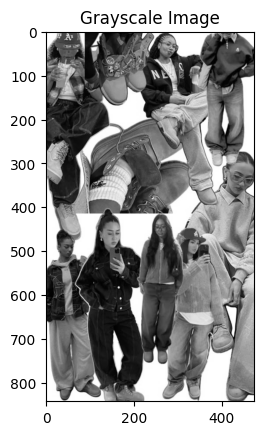

Covariance Matrix:
 [[ 1.56349751  1.55482768  1.53946282 ... -0.3208632  -0.31581368
  -0.313143  ]
 [ 1.55482768  1.56142457  1.55610573 ... -0.31223497 -0.30695104
  -0.30525168]
 [ 1.53946282  1.55610573  1.5672858  ... -0.30262927 -0.29833089
  -0.29733779]
 ...
 [-0.3208632  -0.31223497 -0.30262927 ...  0.73315375  0.70645616
   0.68463226]
 [-0.31581368 -0.30695104 -0.29833089 ...  0.70645616  0.71608615
   0.70728466]
 [-0.313143   -0.30525168 -0.29733779 ...  0.68463226  0.70728466
   0.71624199]]


In [ ]:
from PIL import Image
# Step 1: Load an image (replace with your image path)
image_path = "timbs.jpg"
image = Image.open(image_path)

# Step 2: Convert the image to grayscale
gray_img = image.convert('L')

# Step 3: Optional: Visualize the grayscale image using matplotlib
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Convert grayscale image to numpy array for further processing (if needed)
gray_array = np.array(gray_img)

# Optional: Standardize the data (if needed)
mean = np.mean(gray_array)
std_dev = np.std(gray_array)
standardized_data = (gray_array - mean) / std_dev

# Optional: Calculate the covariance matrix (if needed)
cov_matrix = np.cov(standardized_data, rowvar=False)

# Print covariance matrix
print("Covariance Matrix:\n", cov_matrix)

Eigen Decomposition and Identifying Principal Components: • Compute Eigen Values and Eigen Vectors. • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues. • Identify the Principal Components with the help of cumulative Sum plot.

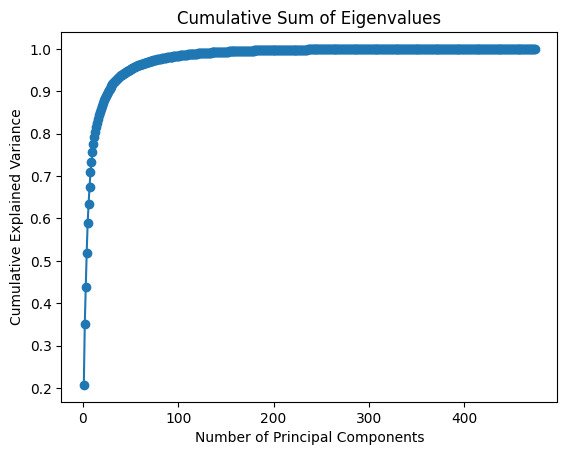

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select top k eigenvectors (choose k=5 as an example)
k = 5
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Cumulative sum of eigenvalues
cumulative_sum = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Plot the cumulative sum
plt.plot(range(1, len(cumulative_sum) + 1), cumulative_sum, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Sum of Eigenvalues')
plt.show()

Reconstruction and Experiment: • Reconstruction: Transform the original data by multiplying it with the selected eigenvec tors(PCs) to obtain a lower-dimensional representation. • Experiments: Pick Four different combination of principal components with various ex plained variance value and compare the result. • Display the Results and Evaluate

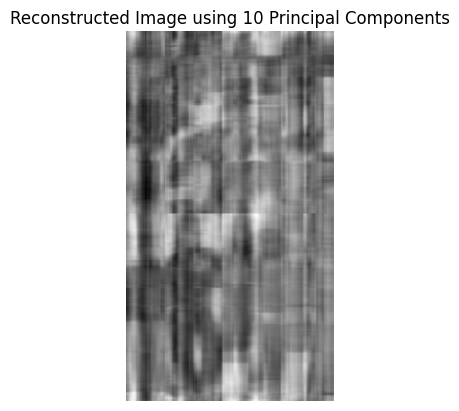

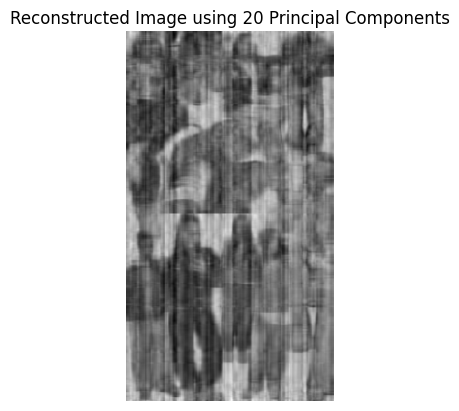

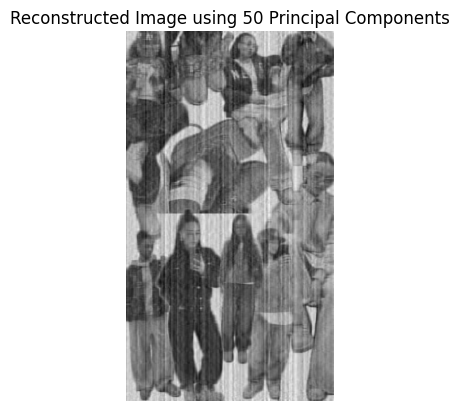

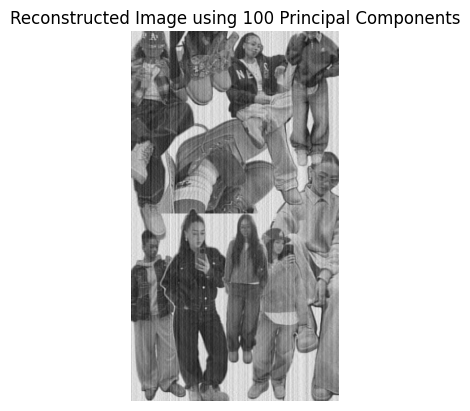

Reconstruction error with 100 principal components: 241.4814975336744


In [ ]:
# Project the standardized data (now gray_img) onto the top k eigenvectors
reduced_data = np.dot(gray_array, top_k_eigenvectors)

# Pick different combinations of principal components
# For example, we can choose the first 3, 4, and 5 principal components
k_values = [10, 20, 50, 100]

for k in k_values:
    top_k_eigenvectors = sorted_eigenvectors[:, :k]
    reduced_data = np.dot(gray_array, top_k_eigenvectors)

    # Reconstruct the image (by projecting back to the original space)
    reconstructed_image = np.dot(reduced_data, top_k_eigenvectors.T)

    # Display the reconstructed image
    plt.imshow(reconstructed_image.reshape(gray_array.shape), cmap='gray')
    plt.title(f'Reconstructed Image using {k} Principal Components')
    plt.axis('off')
    plt.show()

# Compute reconstruction error (mean squared error)
reconstruction_error = np.mean((gray_array - reconstructed_image) ** 2)
print(f'Reconstruction error with {k} principal components: {reconstruction_error}')